<a href="https://colab.research.google.com/github/mcansoylu1/image-processing-scikit-image/blob/main/1_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image Processing in Python
Image Procecesing is operations on images and videos to:

-Enhance an image

-Extract useful information

-Analyze it and make decisions

**In this file you will see basics of the scikit-image**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Importing example images

In [37]:
from skimage import data
rocket_image=data.rocket()
coffee_image=data.coffee()
coins_image=data.coins()
chelsea_image=data.chelsea()
text_image=data.text()
horse_image=data.horse
camera_image=data.camera()

In [3]:
def show_image(image,title='Image',c_map_type='gray'):
  plt.imshow(image,cmap=c_map_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

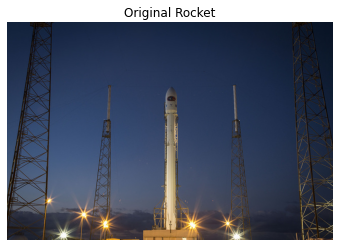

In [4]:
show_image(rocket_image,'Original Rocket')

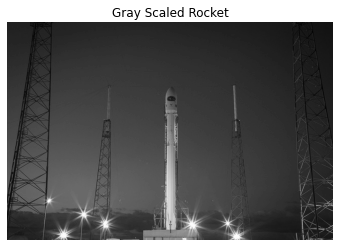

In [5]:
from skimage import color
grayscale_rocket=color.rgb2gray(rocket_image)
show_image(grayscale_rocket,'Gray Scaled Rocket')

In [6]:
'''rgbscale_rocket=color.gray2rgb(grayscale_rocket)
show_image(rgbscale_rocket,'Rocket Image RGB')'''

"rgbscale_rocket=color.gray2rgb(grayscale_rocket)\nshow_image(rgbscale_rocket,'Rocket Image RGB')"

#Sizes and shapes

In [7]:
rocket_image.shape

(427, 640, 3)

In [8]:
grayscale_rocket.shape

(427, 640)

In [9]:
rocket_image.size

819840

#Flipping Image

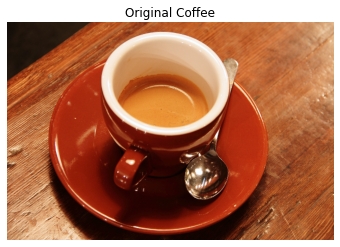

In [11]:
show_image(coffee_image,'Original Coffee')

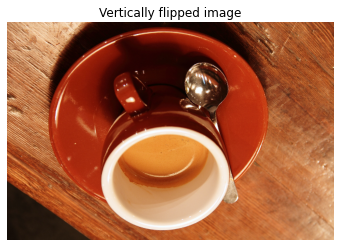

In [12]:
vertically_flipped=np.flipud(coffee_image)

show_image(vertically_flipped,'Vertically flipped image')

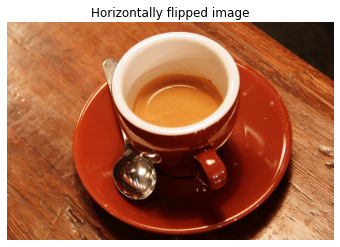

In [13]:
horizontally_flipped=np.fliplr(coffee_image)

show_image(horizontally_flipped,'Horizontally flipped image')

#Obtaining Red Green and Blue values of an image

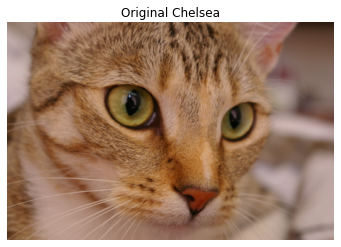

In [14]:
show_image(chelsea_image,'Original Chelsea')

In [15]:
red_chelsea=chelsea_image[:,:,0] #obtaining the red values of the image
green_chelsea=chelsea_image[:,:,1] #obtaining the green values of the image
blue_chelsea=chelsea_image[:,:,2] #obtaining the blue values of the image

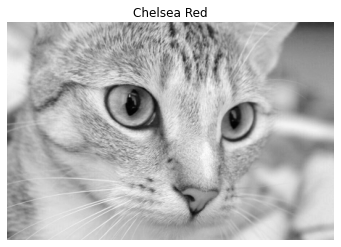

In [16]:
show_image(red_chelsea,'Chelsea Red')

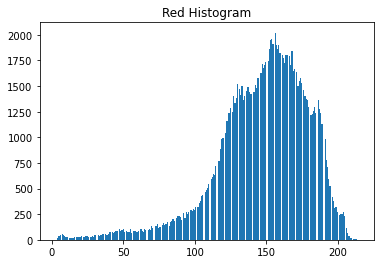

In [17]:
plt.hist(red_chelsea.ravel(),bins=256)
plt.title('Red Histogram')
plt.show()

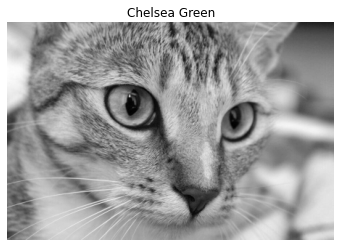

In [18]:
show_image(green_chelsea,'Chelsea Green')

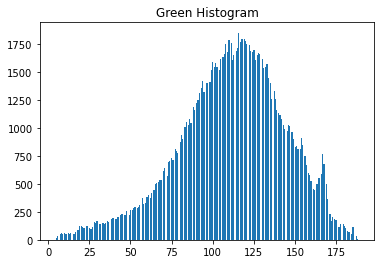

In [19]:
plt.hist(green_chelsea.ravel(),bins=256)
plt.title('Green Histogram')
plt.show()

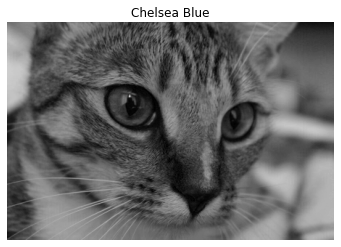

In [20]:
show_image(blue_chelsea,'Chelsea Blue')

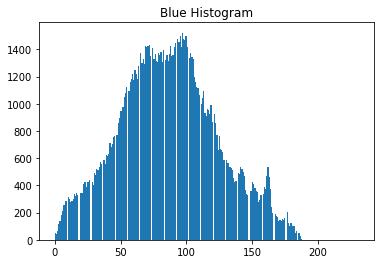

In [21]:
plt.hist(blue_chelsea.ravel(),bins=256)
plt.title('Blue Histogram')
plt.show()

#Thresholding
Partitioning an image into a foreground and background by making it black and white

**must do from already grayscaled images**

There are two categories

1) Global or histogram based: good for uniform backgrounds

2) Local or adaptive: for uneven background illumination

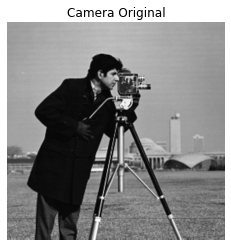

In [38]:
show_image(camera_image,'Camera Original')

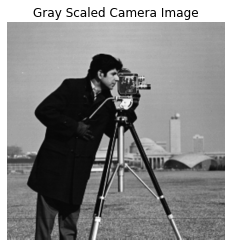

In [39]:
grayscale_camera_image=color.rgb2gray(camera_image)
show_image(grayscale_camera_image,'Gray Scaled Camera Image')

In [40]:
#global
from skimage.filters import threshold_otsu
thresh = threshold_otsu(grayscale_camera_image)
binary_global = grayscale_camera_image > thresh

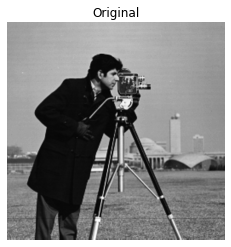

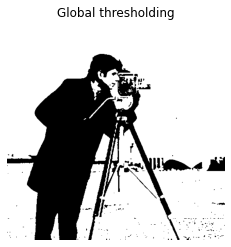

In [41]:
show_image(grayscale_camera_image, 'Original')
show_image(binary_global,'Global thresholding')

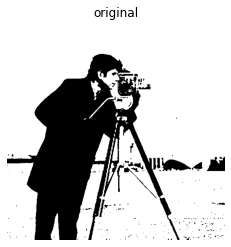

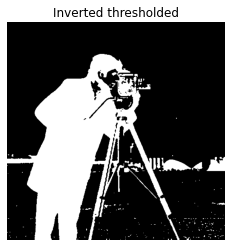

In [42]:
inverted_binary_global=grayscale_camera_image <= thresh
show_image(binary_global,'original')
show_image(inverted_binary_global,'Inverted thresholded')

In [43]:
#local
from skimage.filters import threshold_local
local_thresh = threshold_local(text_image, block_size=35, offset=10)
binary_local = text_image > local_thresh

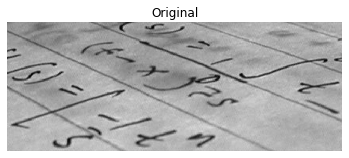

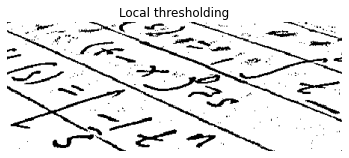

In [44]:
show_image(text_image,'Original')
show_image(binary_local,'Local thresholding')

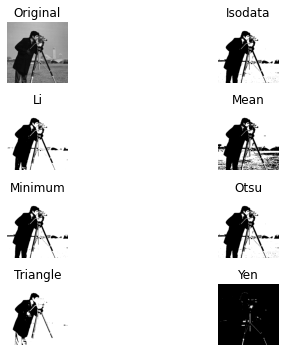

In [45]:
#try all function
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(grayscale_camera_image, verbose=False)
plt.show()